You can do this homework online through [Google Colab](https://colab.research.google.com/). By linking Colab to Github, you can import this file to colab, and save your changes back to Github directly.


# Homework 1: Naive Bayes Classifier


In this homework you will implement the Naive Bayes Classsifier on a data set of votes in the U.S. House of Representatives, with the goal of predicting the party affiliation of each congressman. The input data $X$ is given by a $N$-by-$D$ matrix, where $N$ is the number of examples and $D=16$ is the number of input features. Each feature is binary (yes/no). The targets are given by a length-$N$ sequence of classes, $Y$, that are also binary. More information on the data set can be found at  https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records.



First, we need to download the data. The following code uses the urllib library to request data from a website. The pandas library is a powerful library for data analysis --- we use the read_csv method to automatically parse the comma seperated variable (csv) file.

In [33]:
import pandas 
import urllib.request  
import numpy   # Numerical python.

# Download the data.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
response = urllib.request.urlopen(url)

# Interpret text data into pandas data frame. Interpret 'abstain' votes as 'no'.
dataset  = pandas.read_csv(response, header=None, true_values=['y'], false_values=['n','?'])

# Set the column names.
names = ['label'] + [f'vote_{i}' for i in range(16)]
dataset.columns = names

# Tells pandas that this is a categorical feature.
dataset['label'] = pandas.Categorical(dataset['label'])

print("Dataset shape: ", dataset.shape)
dataset.head() # Prints first 5 examples from the data set.

Dataset shape:  (435, 17)


,label,vote_0,vote_1,vote_2,vote_3,vote_4,vote_5,vote_6,vote_7,vote_8,vote_9,vote_10,vote_11,vote_12,vote_13,vote_14,vote_15
0,republican,False,True,False,True,True,True,False,False,False,True,False,True,True,True,False,True
1,republican,False,True,False,True,True,True,False,False,False,False,False,True,True,True,False,False
2,democrat,False,True,True,False,True,True,False,False,False,False,True,False,True,True,False,False
3,democrat,False,True,True,False,False,True,False,False,False,False,True,False,True,False,False,True
4,democrat,True,True,True,False,True,True,False,False,False,False,True,False,True,True,True,True


Numpy is a powerful library for mathematical operations on vectors and matrices. Here we convert the pandas data into a 2-dimensional numpy array (a matrix). 

In [55]:
X = numpy.array(dataset.iloc[:,1:]) # Convert input features into Numpy array.
Y = dataset['label'].cat.codes # Converts string labels to binary values.

# Split data into train and test set. Use the first 335 examples for training.
num_train = 335
Xtrain = X[0:num_train, :].astype('float32')
Ytrain = Y[0:num_train].astype('f')
Xtest  = X[num_train:,:].astype('f')
Ytest  = Y[num_train:].astype('f')
print(Xtrain.shape, Xtest.shape)

(335, 16) (100, 16)


In [0]:
import numpy as np

def get_distance(q, X):
  # Distance between query q and every point in data matrix X.
  N, D = X.shape
  assert(len(q) == D)
  rval = np.zeros((N,))
  for i in range(N):
    distance = np.sqrt(np.sum((q - X[i,:])**2))
    rval[i] = distance
  return rval

def get_distance_vectorized(q, X):
  return np.sqrt(np.sum((q - X)**2, axis=1))
  

In [85]:
def classify(q, Xtrain, Ytrain):
  # 
  distances = get_distance_vectorized(q, Xtrain)
  min_idx = np.argmin(distances)
  # This is the minimum value: distances[min_idx]
  #min_indices = np.argpartition(distances, 3) # Get 3 closest training points.
  #min_idx = min_indices[0]
  return Ytrain[min_idx]

preds = np.zeros((100,))
for i,q in enumerate(Xtest):
  preds[i] = classify(q, Xtrain, Ytrain)
print("Accuracy is:%0.2f" % (np.sum(preds == Ytest)/len(Ytest)))

Accuracy is:0.88


In [86]:
# Importing all methods from a module.
from numpy import *

# Default arguments.
def myfun(a,b=2):
  return a,b
c,d = myfun(1)
print(c,d)

1 2


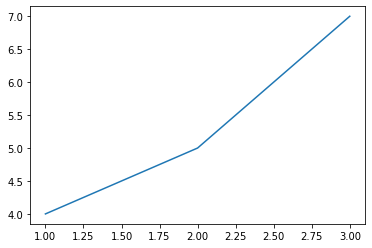

In [87]:
# Plotting is done with matplotlib.
import matplotlib.pyplot as plt

plt.plot([1,2,3], [4,5,7])